In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from ipywidgets import interact, SelectionSlider, Layout

import sys
sys.path.append('../code/')
device = 'cpu'

In [2]:
labels = ['L2 Inhib', 'L5 Inhib', 'L2 Prob']

dpl_data = np.load('../data/beta_inhibition/grid_sweep/dpl_sim_grid.npy')
theta_samples = np.load('../data/beta_inhibition/grid_sweep/theta_sim_grid.npy')


n_sims, n_params = theta_samples.shape
param_values = [np.unique(theta_samples[:, idx]) for idx in range(n_params)]
lookup_dict = {tuple(theta_samples[idx,:]): idx for idx in range(n_sims)}

slider_dict = {f'p{idx}': SelectionSlider(options=param_values[idx],
               description=labels[idx], style={'description_width': '150px'},
               layout=Layout(width='500px')) for 
               idx in range(len(param_values))}


interactive(children=(SelectionSlider(description='L2 Inhib', index=9, layout=Layout(width='500px'), options=(…

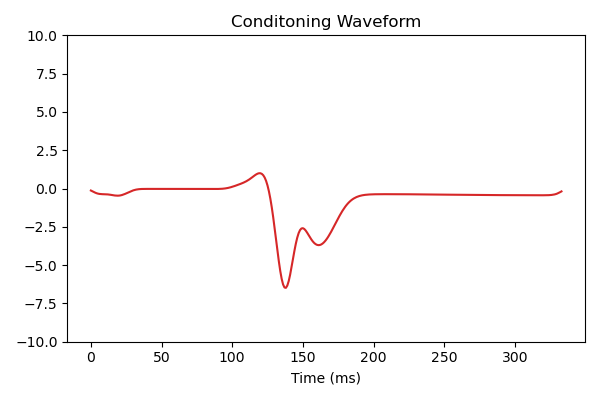

In [8]:
%matplotlib widget
fig, axes = plt.subplots(1, 1, figsize=(6,4), tight_layout=True)


@interact(**slider_dict)
def plot_dipole(p0, p1, p2):
    axes.clear()
    cond_idx = lookup_dict[(p0, p1, p2)]

    axes.plot(dpl_data[cond_idx,:], color='C3')
    axes.set_title('Beta Event Waveform')
    axes.set_xlabel('Time (ms)')
    axes.set_ylim([-10, 10])

interactive(children=(SelectionSlider(description='L2 Inhib', index=10, layout=Layout(width='500px'), options=…

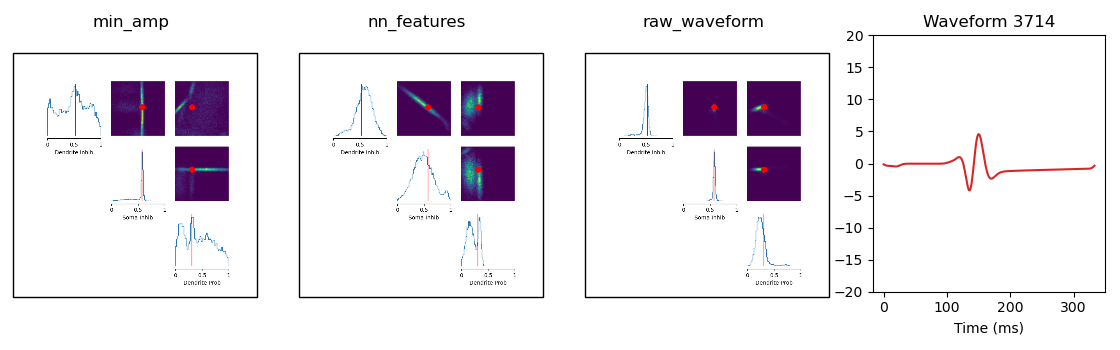

In [6]:
%matplotlib widget

input_type_list = ['min_amp', 'nn_features', 'raw_waveform']
#input_type_list = ['min_amp', 'raw_waveform']
num_plots = len(input_type_list) + 1

fig, axes = plt.subplots(1, num_plots, figsize=(2.55 * num_plots+1 ,3.5), tight_layout=True)


@interact(**slider_dict)
def plot_dipole(p0, p1, p2):
    for idx in range(num_plots):
        axes[idx].clear()
    cond_idx = lookup_dict[(p0, p1, p2)]

    axes[num_plots-1].plot(dpl_data[cond_idx,:], color='C3')
    axes[num_plots-1].set_title(f'Waveform {cond_idx}')
    axes[num_plots-1].set_xlabel('Time (ms)')
    axes[num_plots-1].set_ylim([-20, 20])

    for idx, input_type in enumerate(input_type_list):
        #arr_img = plt.imread(f'../data/beta_inhibition/conditional_plots/{input_type}/params3_sims10240_{input_type}_conditional_{cond_idx}.png')
        arr_img = plt.imread(f'../data/beta_inhibition/marginal_plots/{input_type}/params3_sims10240_{input_type}_marginals_{cond_idx}.png')
        im = OffsetImage(arr_img, zoom=0.28)
        ab = AnnotationBbox(im, (1, 0), xycoords='data', box_alignment=(0.98,0), )
        axes[idx].add_artist(ab)
        axes[idx].axis('off')
        axes[idx].set_title(input_type)

